In [1]:
from basic_tools import *
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
h2_total=pd.read_csv(h2_total_par_filtered_path,index_col='phenotype')
h2_total.shape

(497, 7622)

# Parsing result of partitioned LDSC

In [3]:
suffix_bp_list_power="bp300 bp128 bp64 bp32 bp16 bp8".split()

In [5]:
regression_result_bp_list_dict=dict([make_regression_result_list(h2_total,phenotype,suffix_bp_list_power) for phenotype in phenotypes_par_filtered.index])

In [6]:
h2_bp8_df=pd.DataFrame([[phenotype]+(regression_result_list[-1]['h2']/regression_result_list[-1]['h2'].sum()).tolist() for phenotype,regression_result_list in regression_result_bp_list_dict.items()])
h2_bp8_df=h2_bp8_df.set_index(0)

# Network

## unique phenotype

In [7]:
h2_bp8_df_temp=h2_bp8_df.copy()
edges=h2_bp8_df_temp.T.corr().mask(np.tril(np.ones(h2_bp8_df_temp.T.corr().shape)).astype(np.bool)).stack()
edges=pd.DataFrame([[edge[0][0],edge[0][1],edge[1]] for edge in edges.iteritems()],columns=['source','target','value'])

In [8]:
edges_filtered=edges.loc[(edges['value'] >0.8)]# & (edges['source'] != edges['target'])]

In [9]:
pheno_unique=h2_bp8_df.index.difference(pd.Index(edges_filtered['target'].unique()))

In [10]:
#h2_bp8_df_unique.columns

## sort by value per each loci

In [11]:
h2_bp8_df_unique=h2_bp8_df.loc[pheno_unique]

In [48]:
h2_bp8_df_unique=h2_bp8_df_unique.drop(index='C_BREAST_3')

In [49]:
h2_bp8_df_unique.columns=regression_result_bp_list_dict['23115_irnt'][-1]['category'].apply(category_to_format,args=('padding',))

In [50]:
regional_cutoff=h2_bp8_df_unique.applymap(lambda x : x if x>5/(h2_bp8_df_unique.shape[1]) else np.nan)
regional_cutoff_sum=regional_cutoff.sum()

In [51]:
regional_cutoff_bool=h2_bp8_df_unique.applymap(lambda x : True if x>5/(h2_bp8_df_unique.shape[1]) else False)
regional_cutoff_bool_sum=regional_cutoff_bool.sum()

In [52]:
top_loci_index=regional_cutoff_bool_sum.sort_values(ascending=False)[:10].index
top_loci_index=sorted(top_loci_index)

## Top

In [53]:
#regional_cutoff['bp8.08.008'].sort_values()

In [54]:
loci_sorted_value=pd.DataFrame([row.sort_values(ascending=False).values for idx,row in regional_cutoff.T.iterrows()],index=regional_cutoff.T.index).T
loci_sorted_value_top=loci_sorted_value[top_loci_index].iloc[:10]

In [55]:
loci_sorted_value_top.index=''+(loci_sorted_value_top.index+1).astype(str)

In [56]:
#loci_values_max,loci_values_min=loci_sorted_value_top.max().max(),loci_sorted_value_top.min().min()

In [57]:
loci_sorted_desc=pd.DataFrame([row.sort_values(ascending=False).index for idx,row in regional_cutoff.T.iterrows()],index=regional_cutoff.T.index).T
loci_sorted_desc_top=loci_sorted_desc[top_loci_index].iloc[:10]

# Plotting

## Old

In [69]:
description_dict_merge=pd.read_csv(description_dict_merge_path,sep='\t',index_col='description')
def description_to_short(desc,mode='pub',suffix="basic"):

    description_dict=description_dict_merge
    
    
    if not mode in ['ori','pub','abbr','abbr_pub','abbr_pub_ori']:
        raise    
    if desc in description_dict.index:
        if mode=='ori':
            return desc
        elif mode=='pub':
            #print(correlation_description_dict['description_pub'].loc['Tobacco smoking: Ex-smoker'],description_dict['description_pub'].loc['Tobacco smoking: Ex-smoker'])
            return description_dict['description_pub'+"_"+suffix].loc[desc]
        elif mode=='abbr':
            return description_dict['description_abbr'+"_"+suffix].loc[desc]
        elif mode=='abbr_pub':
            abbr=description_to_short(desc,mode='abbr',suffix=suffix)
            return description_to_short(desc,mode='pub',suffix=suffix) if type(abbr)==float or abbr=='' else abbr
        elif mode=='abbr_pub_ori':
            abbr_pub=description_to_short(desc,mode='abbr_pub',suffix=suffix)
            #print(abbr_pub)
            return desc if type(abbr_pub)==float or abbr_pub=='' else abbr_pub
    else:
        return np.nan



In [70]:
#description_dict_merge

In [71]:
plt.rcParams['font.family']='Arial'

In [72]:
#h2_total.loc['6154_6']#['description']

In [73]:
6154_6

61546

In [74]:
20001_1002

200011002

In [75]:
loci_sorted_desc_top.iloc[::-1,:]

category,bp8.01.136,bp8.06.024,bp8.06.032,bp8.08.008,bp8.11.112,bp8.16.000,bp8.16.008,bp8.16.080,bp8.17.072,bp8.19.000
9,2365,6179_100,3799,20127_irnt,N39,680_4,20126_0,6157_100,6148_4,5161_irnt
8,6032_irnt,20449,2926,20003_1141194794,22506_114,20428,6148_4,D12,H7_LENS,20435
7,20548_3,4283,N39,20426,3436_irnt,20454,4631,5161_irnt,20450,680_4
6,20418,20550_1,5109_irnt,1940,6153_1,22147_irnt,20548_7,K11_OTHGASTR,5158_irnt,20003_1140860696
5,20435,20536_1,3005,N92,6157_3,3710,22147_irnt,30130_irnt,2217_irnt,20409
4,6154_6,20549_3,20428,20449,3786_irnt,20420_irnt,20433_irnt,6179_6,5157_irnt,4440
3,20543,20548_3,6157_3,5105_irnt,22146_irnt,30060_irnt,3456,20418,5119_irnt,20496
2,12340_irnt,Z09,20426,6179_6,20003_1141146234,20449,20418,20454,20420_irnt,12340_irnt
1,22146_irnt,20496,5110_irnt,1150_2,22147_irnt,20539,20002_1452,20535,20496,20405_0
0,20001_1002,20455_irnt,12340_irnt,12340_irnt,20455_irnt,20435,3466,5375_irnt,20426,20449


In [76]:
description_to_short(code_to_description('2365'),'abbr_pub','pleiotropic')

'PSA test'

In [78]:
heatmap_annot

category,bp8.01.136,bp8.06.024,bp8.06.032,bp8.08.008,bp8.11.112,bp8.16.000,bp8.16.008,bp8.16.080,bp8.17.072,bp8.19.000
9,NaN,Supplement: others,Headache,Neuroticism score,Other urinary disorders,Rent house,Bipolar or depression,Stopped smoking\nby other reasons,Cataract,6mm RI
8,Maximum workload\nduring fitness test,Tiredness\nduring depression,Number of\nstop-smokings failure,Bendroflumethiazide,Tobacco never,Anxiety,Cataract,"Benign neoplasm of\ncolon, rectum, etc.",Disorders of lens,Distraction\nduring depression
7,Mania or irritability\ncausing racing thought,Number of\nnumeric memory tests,Other urinary disorders,Restless when anxious,Age started smoking,Frequency of cannabis,Ever unenthusiastic\nfor a week,6mm RI,Worthlessness\nduring depression,Rent house
6,Impact of anxiety,Talking therapies\nto treat anxiety,6mm AA(right),Irritability,Cholesterol lowering\nmedication,Age asthma diagnosed,Mania or irritability\ncausing distraction,Other gastritis,6mm AI (right),Lisinpril
5,Distraction\nduring depression,Weight change\nduring depression,Fracture from simple fall,Menstural disorder,Stopped smoking\nunder precaution,Menstural cycle,Age asthma diagnosed,Monocyte count,Age started\nwearing glasses,Feeling guilty\nafter driking alcohol
4,Medication for\nconstipation: Laxatives,Substances for anxiety,Anxiety,Tiredness\nduring depression,Age asthma diagnosed,Period of worriedness,Age at first episode\nof depression,Supplement: Selenium,6mm AI (left),Spirits intake
3,Number of things worried,Mania or irritability\ncausing racing thought,Stopped smoking\nunder precaution,6mm SMA (left),Age hayfever diagnosed,MCHC,Smoking frequency,Impact of anxiety,3mm CP(left),Felt distant from others\nin past month
2,QRS,Follow-up exam after\nnon-cancer treatments,Restless when anxious,Supplement: Selenium,Atorvastatin,Tiredness\nduring depression,Impact of anxiety,Frequency of cannabis,Period of worriedness,QRS
1,Age hayfever diagnosed,Felt distant from others\nin past month,6mm AA(left),Side of phone use: Right,Age asthma diagnosed,Cannot stop worrying\nduring anxiety,Eczema/dermatitis,Wake up time,Felt distant from others\nin past month,Recommended for\nreducing alcohol
0,Breast cancer,Age when last\ntook cannabis,QRS,QRS,Age when last\ntook cannabis,Distraction\nduring depression,Time from waking\nto first cigarette,Period of unenthusiasm,Restless when anxious,Tiredness\nduring depression


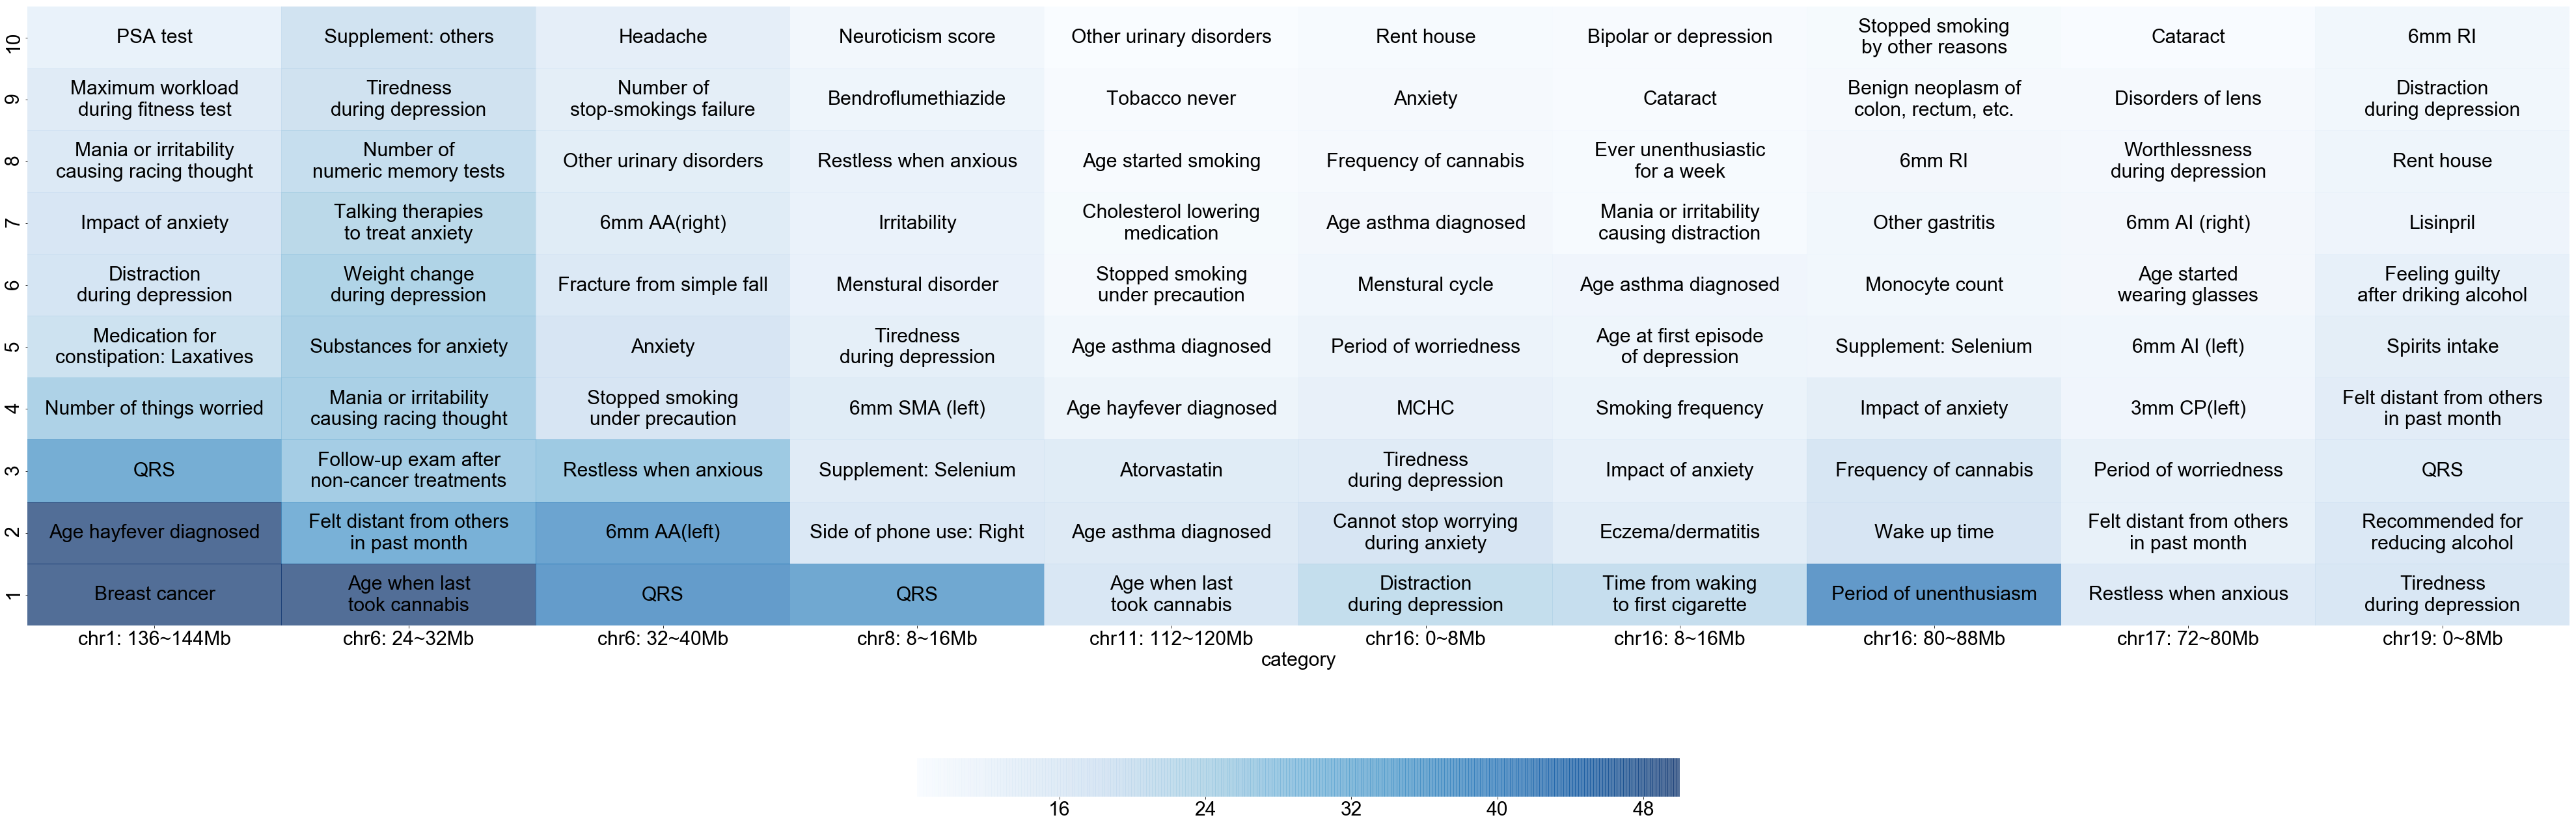

In [79]:
plt.rcParams["figure.figsize"] = (70,25)
plt.rcParams["font.size"] =30

loci_per_fig=10

for i in range(0,int(np.floor(len(top_loci_index)/loci_per_fig))+1):
    start=loci_per_fig*i
    end=np.min([loci_per_fig*i+loci_per_fig,len(top_loci_index)])
    if start==end:continue
    
    heatmap_data=loci_sorted_value_top.iloc[::-1,start:end]/(1/h2_bp8_df_unique.shape[1])
    heatmap_data.columns=heatmap_data.columns.map(lambda x: category_to_format(x,'chr_bp'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'abbr_pub_ori'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: code_to_description(x))
    heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'abbr_pub','pleiotropic'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,0:10].applymap(lambda x: code_to_description(x))
    
    
    plt.cla()
    #fig, ax = plt.subplots(1, 1)
    sns.heatmap(heatmap_data,annot=heatmap_annot,annot_kws={'color':'black'},fmt='s',vmax=50,cmap=plt.cm.Blues,cbar_kws={'orientation':"horizontal",'shrink':0.3},alpha=0.7)#vmin=1/h2_bp8_df_unique.shape[1])#.get_figure()
    #ax.set_ylabel('')
    plt.savefig('pleiotropic_old.svg')
    plt.show()
    
    #print(heatmap_annot)

## New

In [24]:
plt.rcParams['font.family']='Arial'

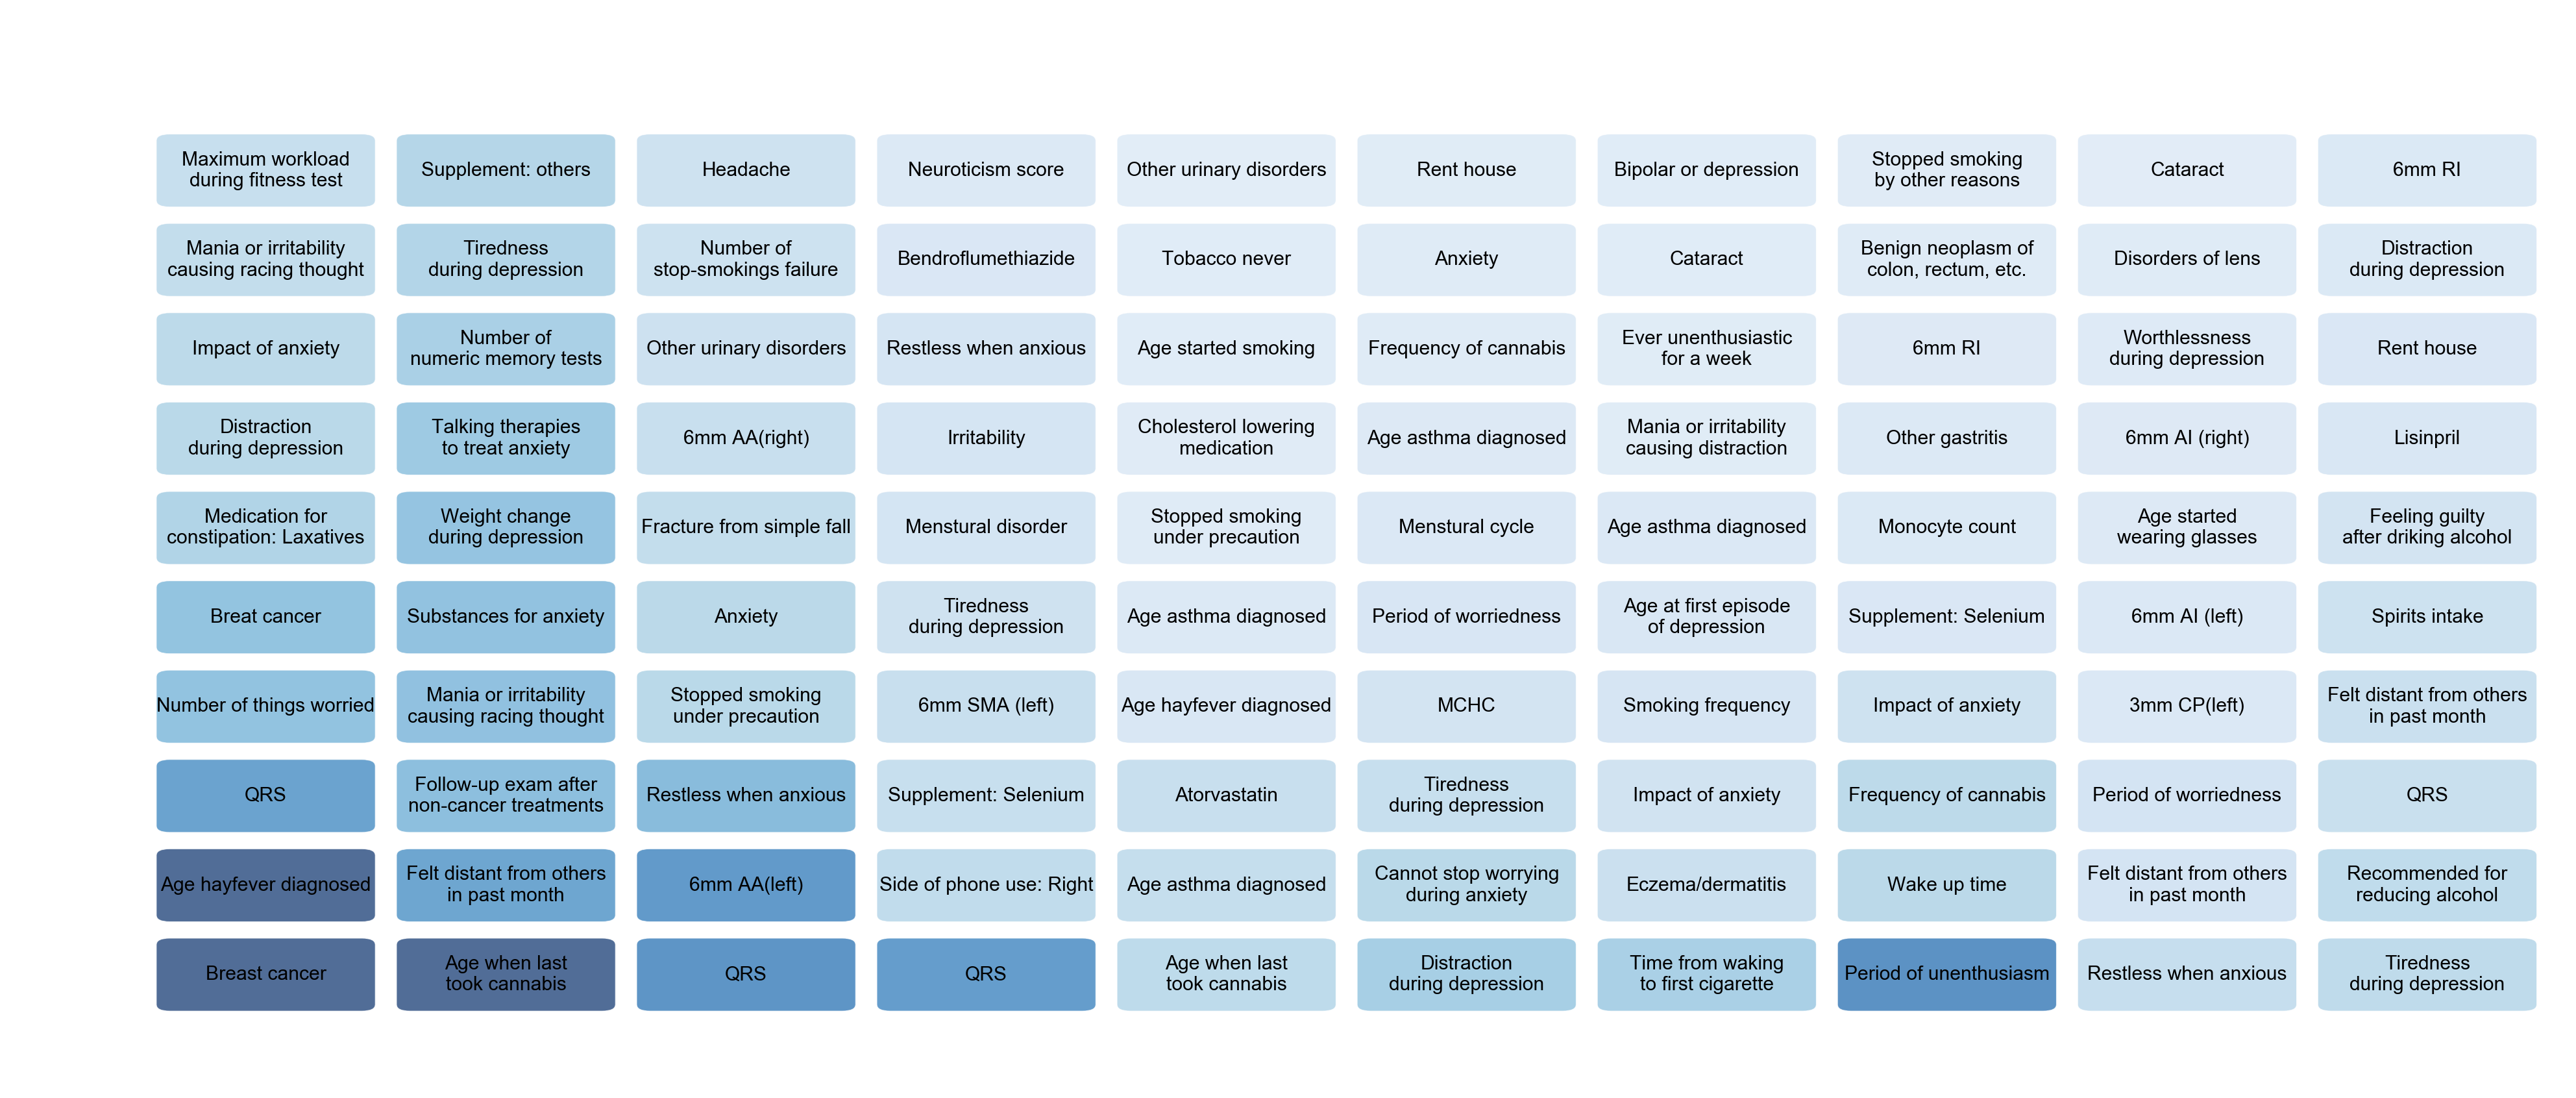

In [26]:
from matplotlib.patches import FancyBboxPatch
from matplotlib.collections import PatchCollection


description_dict_merge=pd.read_csv(description_dict_merge_path,sep='\t',index_col='description')

plt.rcParams["figure.figsize"] = (70,20)
plt.rcParams["font.size"] =30

loci_per_fig=10

for page in range(0,int(np.floor(len(top_loci_index)/loci_per_fig))+1):
    start=loci_per_fig*page
    end=np.min([loci_per_fig*page+loci_per_fig,len(top_loci_index)])
    if start==end:continue
    
    heatmap_data=loci_sorted_value_top.iloc[::-1,start:end]/(1/h2_bp8_df_unique.shape[1])
    heatmap_data.columns=heatmap_data.columns.map(lambda x: category_to_format(x,'chr_bp'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'abbr_pub_ori'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: code_to_description(x))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'pub',1))
    heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'abbr_pub','pleiotropic'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,0:10].applymap(lambda x: code_to_description(x))

    #print(heatmap_annot)
    
    #print(heatmap_annot)
    
    #plt.cla()

    heatmap_data=heatmap_data.T
    heatmap_annot=heatmap_annot.T
    
    #print(heatmap_data.iloc[])
    
    fig,ax = plt.subplots(1)
    
    fig_x_min=0.05
    fig_x_max=0.95
    fig_y_min=0.05
    fig_y_max=0.8

    patches=[]
    colors=[]
    
    
    for i in range(heatmap_data.shape[0]):
        for j in range(heatmap_data.shape[1]):
            xy=np.array([i/heatmap_data.shape[0],1-1/heatmap_data.shape[1]-j/heatmap_data.shape[1]])
            xy[1]=xy[1]*0.9
            xy=fig_x_min+(fig_x_max-fig_x_min)*xy[0],fig_y_min+(fig_y_max-fig_y_min)*xy[1]

            s=heatmap_annot.iloc[i,j]
            data=heatmap_data.iloc[i,j]
            
            width=1/heatmap_data.shape[0]*(fig_x_max-fig_x_min)*0.8
            height=1/heatmap_data.shape[1]*(fig_y_max-fig_y_min)*0.6

            plt.text(x=xy[0]+width/2,y=xy[1]+height/2,s=s,horizontalalignment='center',verticalalignment='center')        
            #print(max(data,1))
            colors.append(data)
            #print(i,j,s,data,max(data,1)/heatmap_data.max().max())
            
            patch=FancyBboxPatch(xy,width=width,height=height,boxstyle="Round,pad=0.005",facecolor=plt.cm.Blues(min(data,50)/50),alpha=0.7,edgecolor='white')
            #patch.add(ax)
            ax.add_artist(patch)
            #ax.add(patch)
            #patches.append(patch)
    #ax.add_patch(rect)
    
    #colors = np.linspace(0, 1, len(patches))
    #colors
    #collection = PatchCollection(patches, cmap=plt.cm.Blues, alpha=0.7,vmin=1)
    #collection.set_array(np.array(colors))
    #ax.add_collection(collection)
    #ax.add_line(line)
    
    #sns.heatmap(heatmap_data,annot=heatmap_annot,fmt='s',vmin=1)#vmin=1/h2_bp8_df_unique.shape[1])#.get_figure()
    #ax.set_ylabel('')
    
    plt.xlim(0,fig_x_max)
    plt.ylim(0,fig_y_max)
    
    plt.axis('off')
    plt.show()

    #print(heatmap_annot)

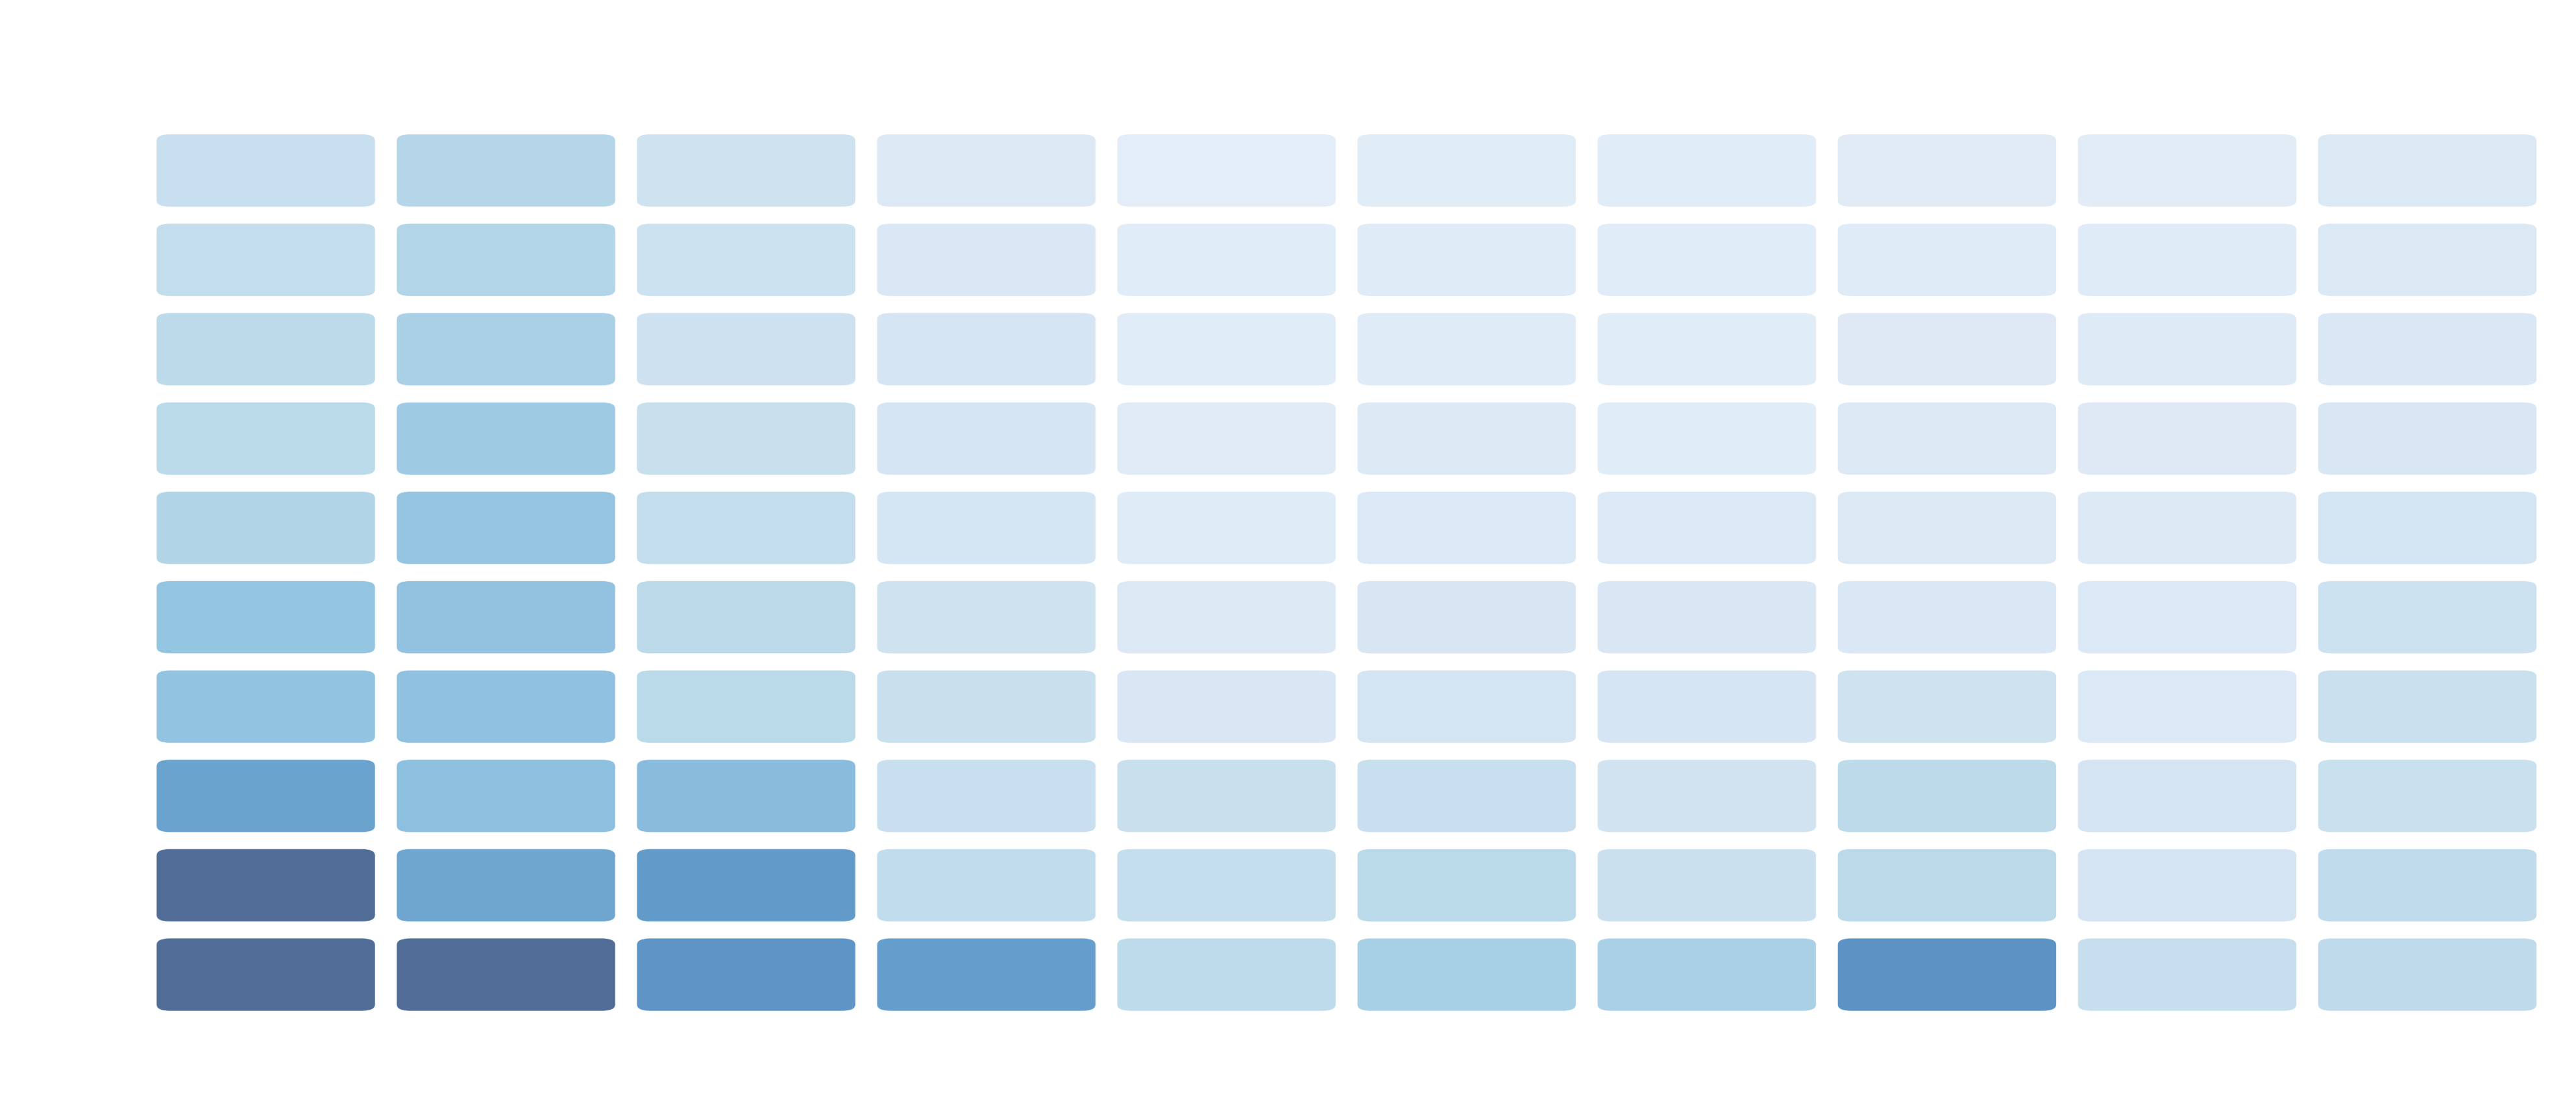

In [32]:
from matplotlib.patches import FancyBboxPatch
from matplotlib.collections import PatchCollection


description_dict_merge=pd.read_csv(description_dict_merge_path,sep='\t',index_col='description')

plt.rcParams["figure.figsize"] = (70,30)
plt.rcParams["font.size"] =30

loci_per_fig=10

for page in range(0,int(np.floor(len(top_loci_index)/loci_per_fig))+1):
    start=loci_per_fig*page
    end=np.min([loci_per_fig*page+loci_per_fig,len(top_loci_index)])
    if start==end:continue
    
    heatmap_data=loci_sorted_value_top.iloc[::-1,start:end]/(1/h2_bp8_df_unique.shape[1])
    heatmap_data.columns=heatmap_data.columns.map(lambda x: category_to_format(x,'chr_bp'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'abbr_pub_ori'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: code_to_description(x))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'pub',1))
    heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'abbr_pub','pleiotropic'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,0:10].applymap(lambda x: code_to_description(x))

    #print(heatmap_annot)
    
    #print(heatmap_annot)
    
    #plt.cla()

    heatmap_data=heatmap_data.T
    heatmap_annot=heatmap_annot.T
    
    #print(heatmap_data.iloc[])
    
    fig,ax = plt.subplots(1)
    
    fig_x_min=0.05
    fig_x_max=0.95
    fig_y_min=0.05
    fig_y_max=0.8

    patches=[]
    colors=[]
    
    
    for i in range(heatmap_data.shape[0]):
        for j in range(heatmap_data.shape[1]):
            xy=np.array([i/heatmap_data.shape[0],1-1/heatmap_data.shape[1]-j/heatmap_data.shape[1]])
            xy[1]=xy[1]*0.9
            xy=fig_x_min+(fig_x_max-fig_x_min)*xy[0],fig_y_min+(fig_y_max-fig_y_min)*xy[1]

            s=heatmap_annot.iloc[i,j]
            data=heatmap_data.iloc[i,j]
            
            width=1/heatmap_data.shape[0]*(fig_x_max-fig_x_min)*0.8
            height=1/heatmap_data.shape[1]*(fig_y_max-fig_y_min)*0.6

            plt.text(x=xy[0]+width/2,y=xy[1]+height/2,s=s,horizontalalignment='center',verticalalignment='center')        
            #print(max(data,1))
            colors.append(data)
            #print(i,j,s,data,max(data,1)/heatmap_data.max().max())
            
            patch=FancyBboxPatch(xy,width=width,height=height,boxstyle="Round,pad=0.005",facecolor=plt.cm.Blues(min(data,50)/50),alpha=0.7,edgecolor='white')
            #patch.add(ax)
            ax.add_artist(patch)
            #ax.add(patch)
            #patches.append(patch)
    #ax.add_patch(rect)
    
    #colors = np.linspace(0, 1, len(patches))
    #colors
    #collection = PatchCollection(patches, cmap=plt.cm.Blues, alpha=0.7,vmin=1)
    #collection.set_array(np.array(colors))
    #ax.add_collection(collection)
    #ax.add_line(line)
    
    #sns.heatmap(heatmap_data,annot=heatmap_annot,fmt='s',vmin=1)#vmin=1/h2_bp8_df_unique.shape[1])#.get_figure()
    #ax.set_ylabel('')
    
    plt.xlim(0,fig_x_max)
    plt.ylim(0,fig_y_max)
    
    plt.axis('off')
    plt.savefig('pleiotropic.svg')
    plt.show()

    #print(heatmap_annot)